# Telco Churn - EDA & Model 

In [329]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import tkinter
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter

## Load dữ liệu

In [330]:
file_path ="https://drive.google.com/uc?export=download&id=1jMazv2yoYR9tEG1gJ6WF9BdE5EN3T8m_"
df = pd.read_csv(file_path)

## Thông tin về dataset

Bộ dữ liệu bao gồm thông tin về:

* Khách hàng đã rời đi trong tháng trước – cột có tên là Churn
* Các dịch vụ mà mỗi khách hàng đã đăng ký – điện thoại, nhiều đường dây, internet, bảo mật trực tuyến, sao lưu trực tuyến, bảo vệ thiết bị, hỗ trợ kỹ thuật và truyền phát trực tuyến TV và phim
* Thông tin tài khoản khách hàng - họ đã là khách hàng được bao lâu, hợp đồng, phương thức thanh toán, thanh toán không cần giấy tờ, phí hàng tháng và tổng phí
* Thông tin nhân khẩu học về khách hàng - giới tính, độ tuổi và liệu họ có đối tác và người phụ thuộc hay không

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 



<div >
<ul>
<li>Có tổng cộng 21 cột: 3 cột số, 16 cột phân loại, 1 cột id và 1 cột mục tiêu
<li>'Tổng phí' cung cấp một giá trị số, nhưng các số này được lưu trữ dưới dạng đối tượng
<li>Một số tính năng phân loại được lưu trữ dưới dạng chuỗi
<li>Có 7043 hàng trong toàn bộ tập dữ liệu
<li>Churn là biến mục tiêu
</ul>
</div>

## Khám phá tổng quan về dữ liệu

In [332]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Thuộc tính dữ liệu

* <code>customerID</code> - ID khách hàng

* <code>gender</code> -giới tính (nữ, nam)

* <code>SeniorCitizen</code> - Khách hàng có phải là người cao tuổi hay không (1, 0)

* <code>Partner</code> - khách hàng có đối tác hay không (Yes, No)

* <code>Dependents</code> - Khách hàng có người phụ thuộc hay không (Yes, No)

* <code>tenure</code> - Số tháng khách hàng đã gắn bó với công ty
* <code>PhoneService</code> - Khách hàng có dịch vụ điện thoại hay không  (Yes, No)

* <code>MultipleLines</code> - Khách hàng có dịch vụ đa dòng hay không  (Yes, No, No phone service)

* <code>InternetService</code> - Nhà cung cấp dịch vụ internet của khách hàng  (DSL, Fiber optic, No)

* <code>OnlineSecurity</code> - Khách hàng có bảo mật trực tuyến hay không  (Yes, No, No internet service)

* <code>OnlineBackup</code> - Khách hàng có sao lưu trực tuyến hay không  (Yes, No, No internet service)

* <code>DeviceProtection</code> - Khách hàng có bảo vệ thiết bị hay không (Yes, No, No internet service)

* <code>TechSupport</code> - Khách hàng có được hỗ trợ kỹ thuật hay không  (Yes, No, No internet service)

* <code>StreamingTV</code> - Khách hàng có truyền hình trực tuyến hay không  (Yes, No, No internet service)

* <code>StreamingMovies</code> - Khách hàng có streaming phim hay không  (Yes, No, No internet service)

* <code>Contract</code> - Thời hạn hợp đồng của khách hàng  (Month-to-month, One year, Two year)

* <code>PaperlessBilling</code> - Khách hàng có thanh toán không cần giấy tờ hay không  (Yes, No)

* <code>PaymentMethod</code> - Phương thức thanh toán của khách hàng (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

* <code>MonthlyCharges</code> - Số tiền phải trả mà khách hàng hàng tháng
* <code>TotalCharges</code> - Tổng số tiền phải trả mà khách hàng
* <code>Churn</code> - Khách hàng có rời bỏ hay không 

## Tiền xử lý dữ liệu

Ta không cần cột ID khách hàng nên sẽ xóa nó.

In [333]:
data=df.drop('customerID', axis=1)

## Xử lý các giá trị rỗng

In [334]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Không có dữ liệu rỗng trong tập dữ liệu

## Xử lý lỗi: không thể chuyển đổi chuỗi thành float

In [ ]:
# df['TotalCharges'] = df['TotalCharges'].astype(float)

* Sẽ xảy ra lỗi khi chuyển đổi chuỗi thành float
* Ta có thể có các chuỗi trống trong cột 'TotalCharges', nhưng vì chúng được xác định là chuỗi nên chúng không xuất hiện dưới dạng Giá trị Null.
* Ta sẽ loại bỏ các hàng trên khỏi tập dữ liệu và chuyển đổi chuỗi thành float

In [ ]:
step1 = [len(i.split()) for i in df['TotalCharges']]
step2 = [i for i in range(len(step1)) if step1[i] != 1]
print('Số mục có chuỗi trống: ', len(step2))

Số mục có chuỗi trống:  11


In [ ]:
data= data.drop(step2, axis = 0).reset_index(drop=True)

In [ ]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

## Xử lý các giá trị trùng lặp

In [ ]:
print('Số lượng giá trị trùng lặp trong tập dữ liệu:', data.duplicated().sum())

Số lượng giá trị trùng lặp trong tập dữ liệu: 22


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 
 17  

## Label Encoding

In [ ]:
columns = list(data.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(data[i].unique()) > 6:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

categoric_columns = categoric_columns[:-1]

In [ ]:
numeric_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
categoric_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df = data.copy()

df[categoric_columns] = df[categoric_columns].apply(le.fit_transform)
df[['Churn']] = df[['Churn']].apply(le.fit_transform)

In [ ]:
df[numeric_columns].describe()

,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000
mean,32.520399,64.888666,2290.353388
std,24.520441,30.064769,2266.820832
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,408.312500
50%,29.000000,70.400000,1403.875000
75%,56.000000,89.900000,3807.837500
max,72.000000,118.750000,8684.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   int32  
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   int32  
 3   Dependents        7010 non-null   int32  
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   int32  
 6   MultipleLines     7010 non-null   int32  
 7   InternetService   7010 non-null   int32  
 8   OnlineSecurity    7010 non-null   int32  
 9   OnlineBackup      7010 non-null   int32  
 10  DeviceProtection  7010 non-null   int32  
 11  TechSupport       7010 non-null   int32  
 12  StreamingTV       7010 non-null   int32  
 13  StreamingMovies   7010 non-null   int32  
 14  Contract          7010 non-null   int32  
 15  PaperlessBilling  7010 non-null   int32  
 16  PaymentMethod     7010 non-null   int32  
 17  

### Dummies

In [ ]:
df_dummies=data.copy()
df_dummies['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_dummies['Churn'].replace(to_replace='No',  value=0, inplace=True)

df_dummies = pd.get_dummies(df_dummies)
df_dummies = df_dummies.astype(int)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7031
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   SeniorCitizen                            7010 non-null   int32
 1   tenure                                   7010 non-null   int32
 2   MonthlyCharges                           7010 non-null   int32
 3   TotalCharges                             7010 non-null   int32
 4   Churn                                    7010 non-null   int32
 5   gender_Female                            7010 non-null   int32
 6   gender_Male                              7010 non-null   int32
 7   Partner_No                               7010 non-null   int32
 8   Partner_Yes                              7010 non-null   int32
 9   Dependents_No                            7010 non-null   int32
 10  Dependents_Yes                           7010 non-null   int32
 11  PhoneServ

## Biến mục tiêu Churn

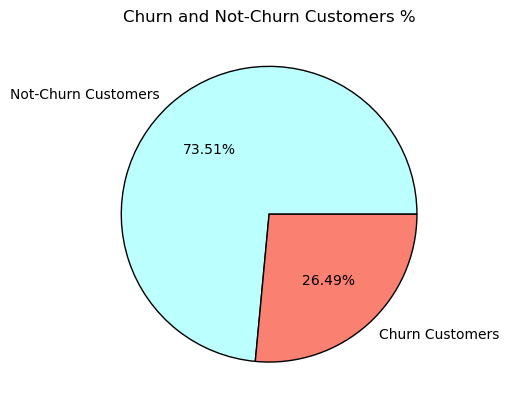

In [ ]:
l1 = list(df['Churn'].value_counts())
pie_values = [l1[0] / sum(l1) * 100, l1[1] / sum(l1) * 100]
colorsChurn= ['#BBFFFF','#FA8072']
plt.pie(pie_values,labels = ['Not-Churn Customers','Churn Customers'],autopct = '%1.2f%%',wedgeprops= {'edgecolor': 'black','linewidth': 1, 'antialiased' : True},colors=colorsChurn)
plt.title('Churn and Not-Churn Customers %')
plt.show()


* Bộ dữ liệu mất cân bằng với tỷ lệ gần như 1:4

## Thuộc tính định lượng

Chỉ có ba cột dữ liệu số: tenure, monthly charges and total charges. Phân bố mật độ xác suất có thể được ước tính bằng cách sử dụng hàm histplot seaborn.

c:\Users\THINKPAD T460\.conda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\THINKPAD T460\.conda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


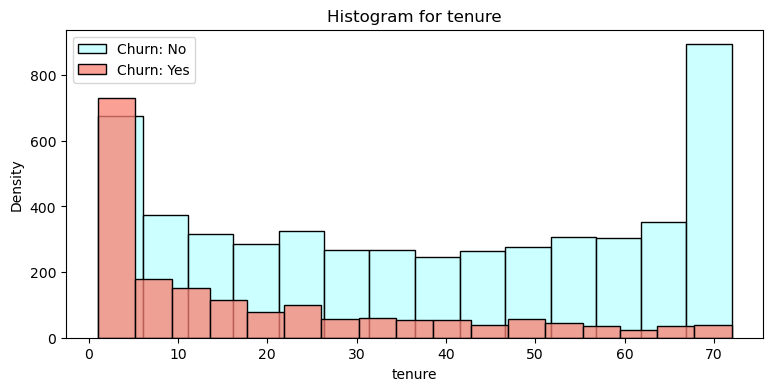

c:\Users\THINKPAD T460\.conda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\THINKPAD T460\.conda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


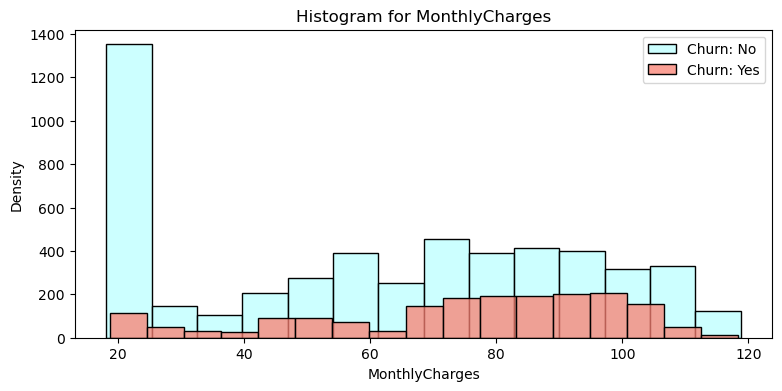

c:\Users\THINKPAD T460\.conda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\THINKPAD T460\.conda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


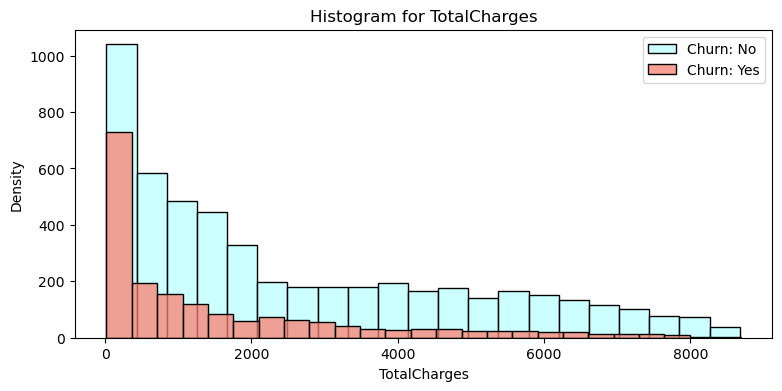

In [ ]:
def histplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("Histogram for {}".format(feature))
    sns.histplot(data[data['Churn'] == 'No'][feature].dropna(), color= '#BBFFFF',label= 'Churn: No')
    sns.histplot(data[data['Churn'] == 'Yes'][feature].dropna(), color= '#FA8072',label= 'Churn: Yes')
    plt.legend()
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()
histplot('tenure')
histplot('MonthlyCharges')
histplot('TotalCharges')

In [ ]:
histplot('tenure')
histplot('MonthlyCharges')
histplot('TotalCharges')

c:\Users\THINKPAD T460\.conda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\THINKPAD T460\.conda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


c:\Users\THINKPAD T460\.conda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


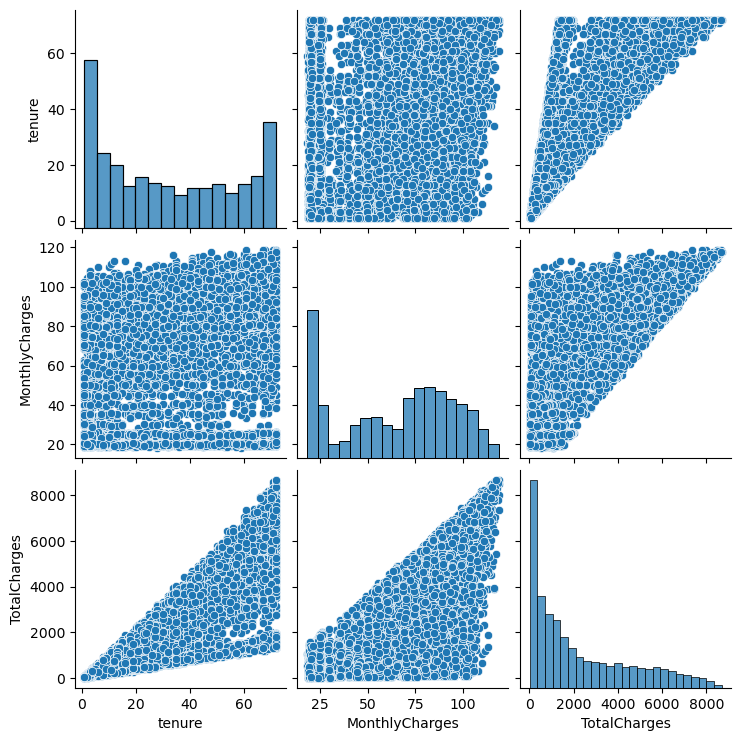

In [ ]:
selected_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.pairplot(df[selected_columns])
plt.show()

Từ các đồ thị trên ta có thể kết luận rằng:

* Khách hàng có giá trị tenure thấp hoặc TotalCharges thấp có nhiều khả năng rời bỏ

* Khách hàng có Phí hàng tháng(MonthlyCharges) cao hơn cũng có nhiều khả năng rời bỏ hơn

* Tenure và TotalCharges có lẽ là những thuộc tính quan trọng

## Thuộc tính phân loại 

Bộ dữ liệu này có 16 thuộc tính phân loại:
* Sáu thuộc tính nhị phân (Có/Không)
* Chín thuộc tính tính với ba giá trị duy nhất cho mỗi thuộc tính (danh mục)
* Một thuộc tính có bốn giá trị duy nhất

### Về khách hàng

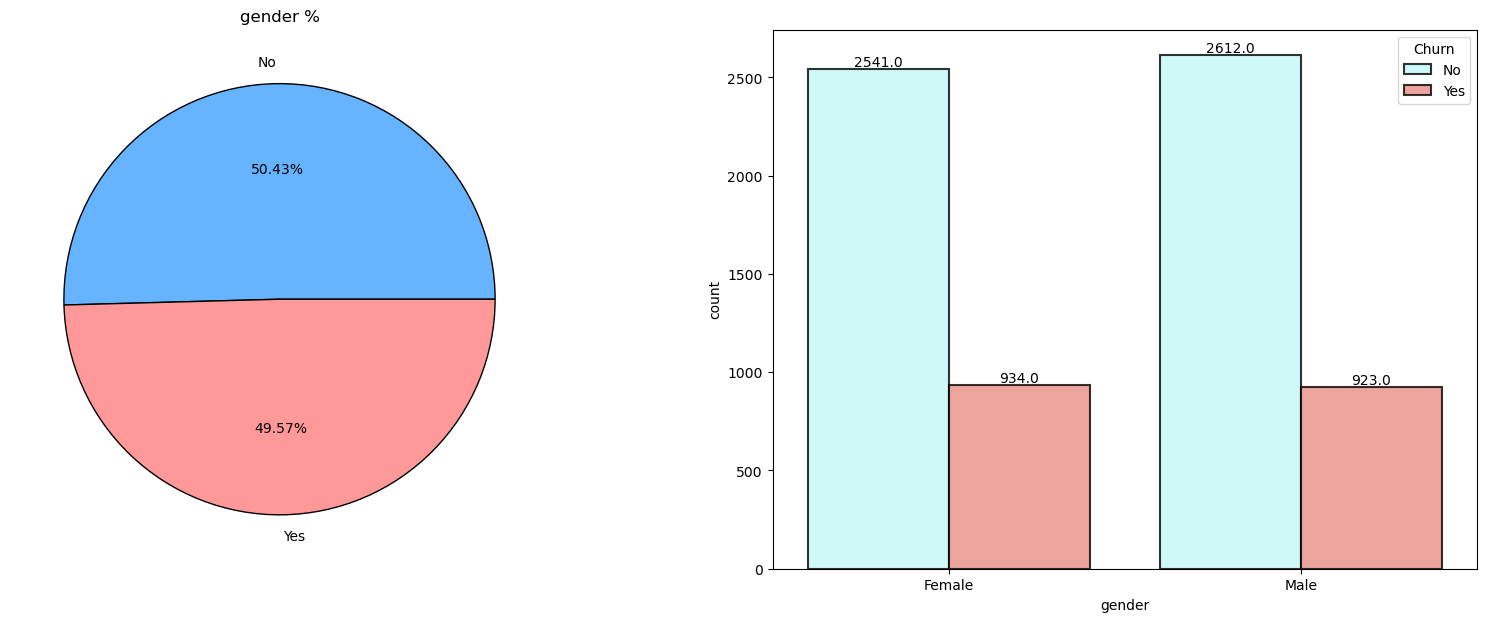

In [ ]:
l3 = list(data['gender'].value_counts())
pie_values = [l3[0] / sum(l3) * 100, l3[1] / sum(l3) * 100]
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,7))
colors = ['#66b3ff','#ff9999']
plt.subplot(1,2,1)
plt.pie(pie_values,labels = ['No','Yes'],autopct = '%1.2f%%',wedgeprops= {'edgecolor': 'black','linewidth': 1, 'antialiased' : True},colors=colors)
plt.title('gender %')
plt.subplot(1,2,2)
ax=sns.countplot(data = data, x = 'gender',hue='Churn',alpha=0.8,palette=colorsChurn, edgecolor='black', linewidth=1.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()

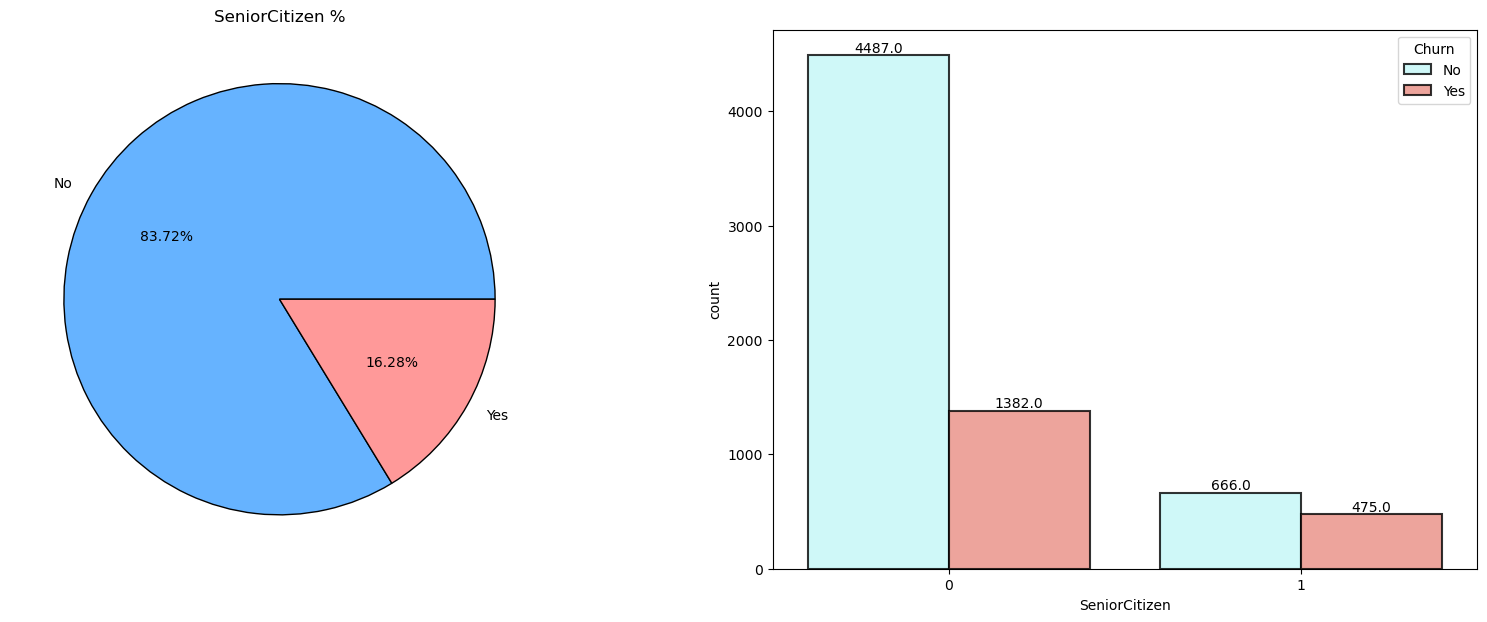

In [ ]:
l3 = list(data['SeniorCitizen'].value_counts())
pie_values = [l3[0] / sum(l3) * 100, l3[1] / sum(l3) * 100]
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,7))
colors = ['#66b3ff','#ff9999']
plt.subplot(1,2,1)
plt.pie(pie_values,labels = ['No','Yes'],autopct = '%1.2f%%',wedgeprops= {'edgecolor': 'black','linewidth': 1, 'antialiased' : True},colors=colors)
plt.title('SeniorCitizen %')
plt.subplot(1,2,2)
ax=sns.countplot(data = data, x = 'SeniorCitizen',hue='Churn',alpha=0.8,palette=colorsChurn, edgecolor='black', linewidth=1.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()

* Từ dữ liệu trên, ta có thể nói rằng dữ liệu được cân bằng về giới tính. 
* Giới tính không phải là dấu hiệu của sự rời bỏ.
* Không có mối quan hệ đặc biệt nào giữa các giá trị phân loại này và các đặc điểm số chính.

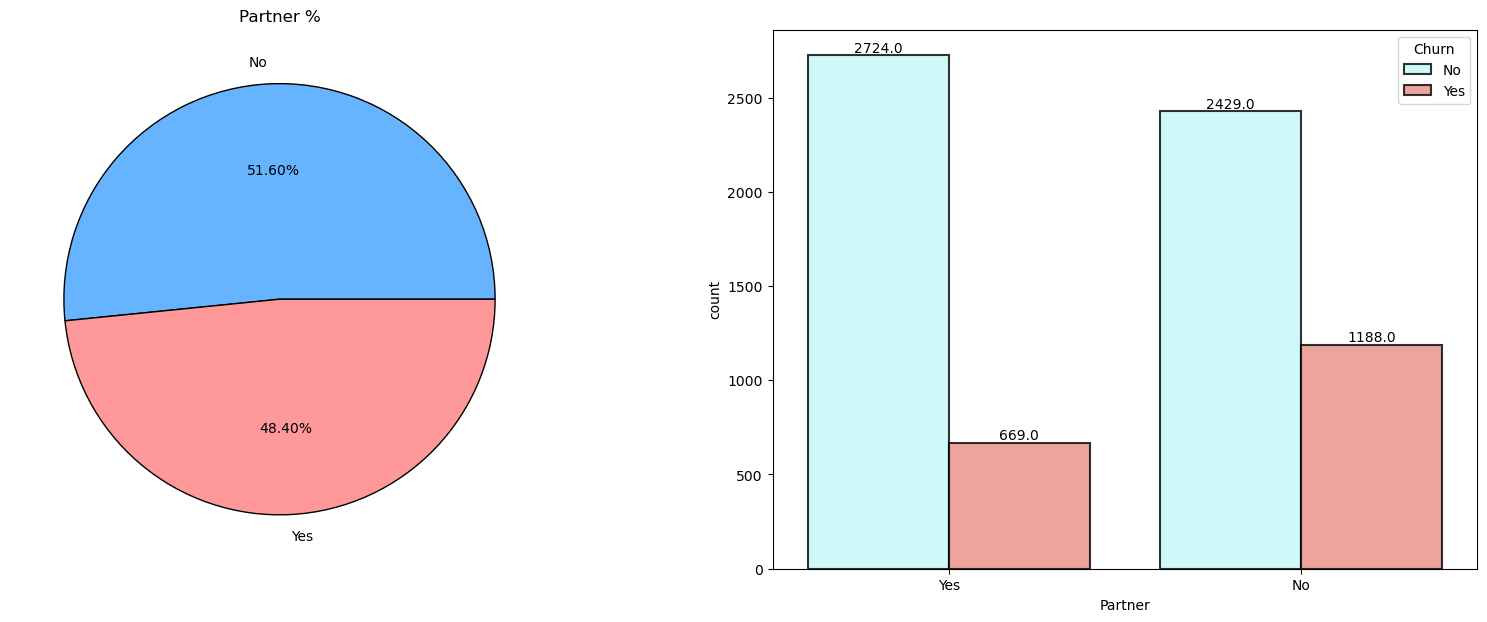

In [ ]:
l4 = list(data['Partner'].value_counts())
pie_values = [l4[0] / sum(l4) * 100, l4[1] / sum(l4) * 100]
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,7))
colors = ['#66b3ff','#ff9999']
plt.subplot(1,2,1)
plt.pie(pie_values,labels = ['No','Yes'],autopct = '%1.2f%%',wedgeprops= {'edgecolor': 'black','linewidth': 1, 'antialiased' : True},colors=colors)
plt.title('Partner %')
plt.subplot(1,2,2)
ax=sns.countplot(data = data, x = 'Partner',hue='Churn',alpha=0.8,palette=colorsChurn, edgecolor='black', linewidth=1.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()

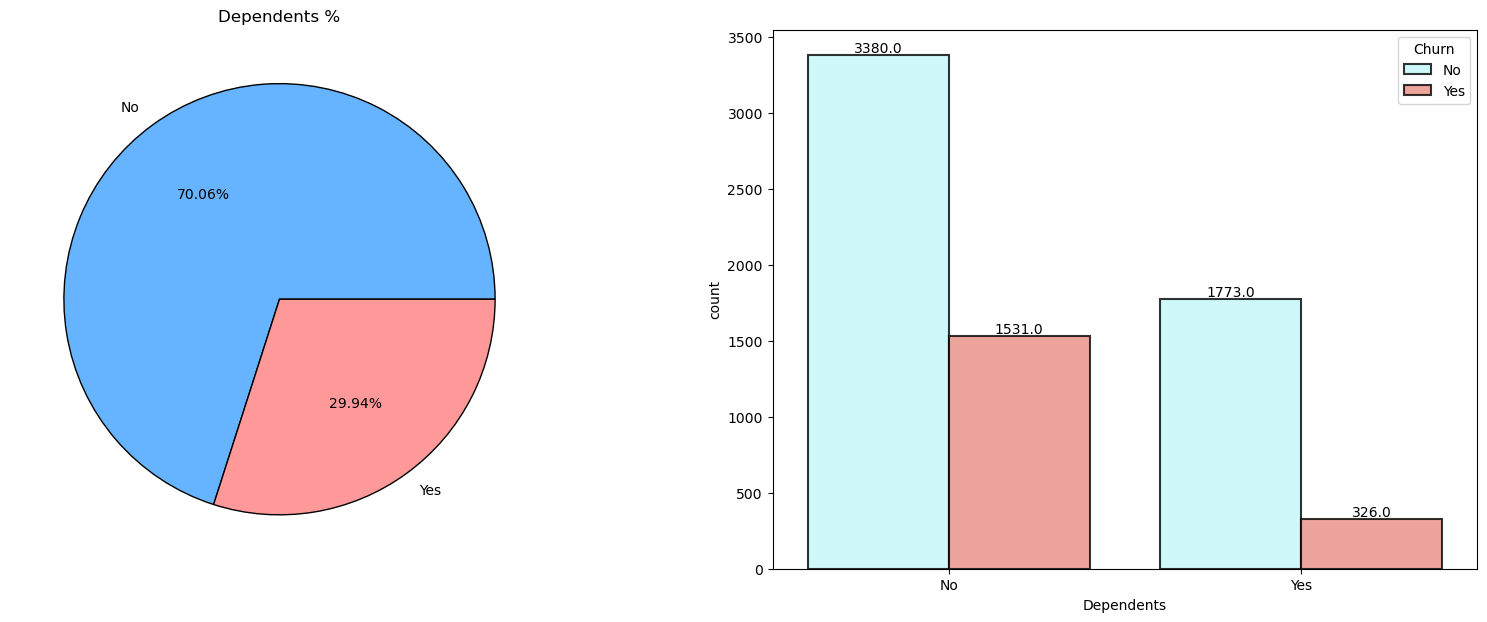

In [ ]:
l5 = list(data['Dependents'].value_counts())
pie_values = [l5[0] / sum(l5) * 100, l5[1] / sum(l5) * 100]
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,7))
colors = ['#66b3ff','#ff9999']
plt.subplot(1,2,1)
plt.pie(pie_values,labels = ['No','Yes'],autopct = '%1.2f%%',wedgeprops= {'edgecolor': 'black','linewidth': 1, 'antialiased' : True},colors=colors)
plt.title('Dependents %')
plt.subplot(1,2,2)
ax=sns.countplot(data = data, x = 'Dependents',hue='Churn',alpha=0.8,palette=colorsChurn, edgecolor='black', linewidth=1.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()

* Khách hàng không có Partner có nhiều khả năng rời bỏ hơn
* Khách hàng không có Dependents cũng có nhiều khả năng rời bỏ

### Về dịch vụ

Bây giờ chúng ta hãy nhìn vào các dịch vụ mà khách hàng đang sử dụng. Chỉ có hai dịch vụ chính: PhoneService và InternetService nhưng dịch vụ trước có nhiều dịch vụ bổ sung như OnlineBackup, OnlineSecurity,...

In [ ]:
phone = data[df['Churn'] == 1]['PhoneService'].value_counts()
pie_values1 = [phone[0] / sum(phone) * 100, phone[1] / sum(phone) * 100]

MultipleLines = data[df['Churn'] == 1]['MultipleLines'].value_counts()
pie_values2 = [MultipleLines[0] / sum(MultipleLines) * 100, MultipleLines[1] / sum(MultipleLines) * 100, MultipleLines[2] / sum(MultipleLines) * 100]

InternetService = data[df['Churn'] == 1]['InternetService'].value_counts()
pie_values3 = [InternetService[0] / sum(InternetService) * 100, InternetService[1] / sum(InternetService) * 100, InternetService[2] / sum(InternetService) * 100]

StreamingTV = data[df['Churn'] == 1]['StreamingTV'].value_counts()
pie_values4 = [StreamingTV[0] / sum(StreamingTV) * 100, StreamingTV[1] / sum(StreamingTV) * 100, StreamingTV[2] / sum(StreamingTV) * 100]

StreamingMovies = data[df['Churn'] == 1]['StreamingMovies'].value_counts()
pie_values5 = [StreamingMovies[0] / sum(StreamingMovies) * 100, StreamingMovies[1] / sum(StreamingMovies) * 100, StreamingMovies[2] / sum(StreamingMovies) * 100]

OnlineSecurity = data[df['Churn'] == 1]['OnlineSecurity'].value_counts()
pie_values6 = [OnlineSecurity[0] / sum(OnlineSecurity) * 100, OnlineSecurity[1] / sum(OnlineSecurity) * 100, OnlineSecurity[2] / sum(OnlineSecurity) * 100]

OnlineBackup = data[df['Churn'] == 1]['OnlineBackup'].value_counts()
pie_values7 = [OnlineBackup[0] / sum(OnlineBackup) * 100, OnlineBackup[1] / sum(OnlineBackup) * 100, OnlineBackup[2] / sum(OnlineBackup) * 100]

DeviceProtection = data[df['Churn'] == 1]['DeviceProtection'].value_counts()
pie_values8 = [DeviceProtection[0] / sum(DeviceProtection) * 100, DeviceProtection[1] / sum(DeviceProtection) * 100, DeviceProtection[2] / sum(DeviceProtection) * 100]

TechSupport = data[df['Churn'] == 1]['TechSupport'].value_counts()
pie_values9 = [TechSupport[0] / sum(TechSupport) * 100, TechSupport[1] / sum(TechSupport) * 100, TechSupport[2] / sum(TechSupport) * 100]

C:\Users\THINKPAD T460\AppData\Local\Temp\ipykernel_1868\2756690898.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pie_values1 = [phone[0] / sum(phone) * 100, phone[1] / sum(phone) * 100]
C:\Users\THINKPAD T460\AppData\Local\Temp\ipykernel_1868\2756690898.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pie_values2 = [MultipleLines[0] / sum(MultipleLines) * 100, MultipleLines[1] / sum(MultipleLines) * 100, MultipleLines[2] / sum(MultipleLines) * 100]
C:\Users\THINKPAD T460\AppData\Local\Temp\ipykernel_1868\2756690898.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future

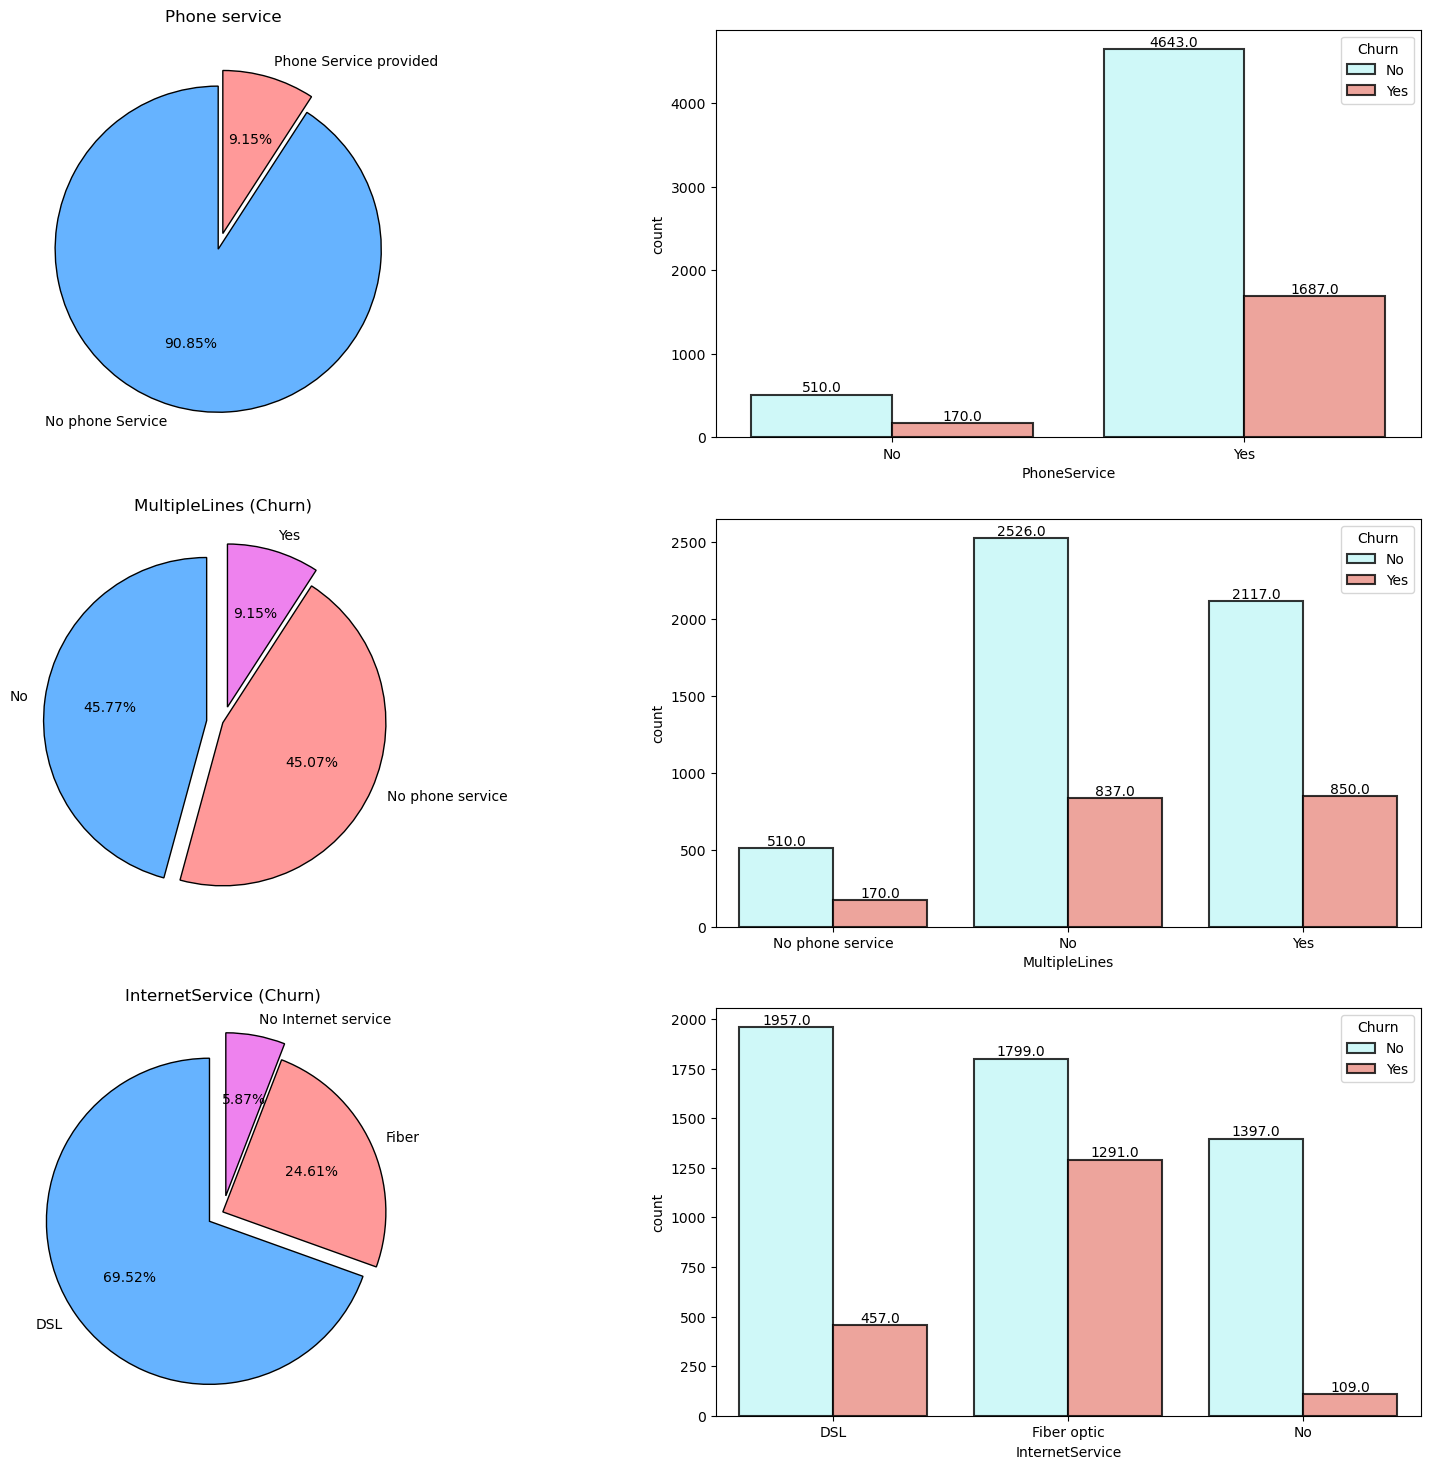

In [ ]:
fig = plt.figure(figsize=(20,18))
colorsSer = ['#66b3ff','#ff9999','#EE82EE']
plt.subplot(3,2,1)
plt.pie(pie_values1,labels = ['No phone Service','Phone Service provided'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors=colorsSer,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Phone service')
plt.subplot(3,2,2)
ax=sns.countplot(data = data, x = 'PhoneService',hue='Churn',alpha=0.8,palette=colorsChurn, edgecolor='black', linewidth=1.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    
plt.subplot(3,2,3)
plt.pie(pie_values2,labels = ['No','No phone service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors=colorsSer,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines')
plt.subplot(3,2,4)
ax=sns.countplot(data = data, x = 'MultipleLines',hue='Churn',alpha=0.8,palette=colorsChurn, edgecolor='black', linewidth=1.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.subplot(3,2,5)
plt.pie(pie_values3,labels = ['DSL','Fiber','No Internet service'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors=colorsSer,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService')
plt.subplot(3,2,6)
ax=sns.countplot(data = data, x = 'InternetService',hue='Churn',alpha=0.8,palette=colorsChurn, edgecolor='black', linewidth=1.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

* Rất ít khách hàng không có dịch vụ điện thoại
* Khách hàng sử dụng dịch vụ MultipleLines có tỷ lệ rời bỏ cao hơn một chút
* Khách hàng không có internet có tỷ lệ rời bỏ rất thấp
* Khách hàng sử dụng Fiber có nhiều khả năng rời bỏ hơn những khách hàng có kết nối DSL

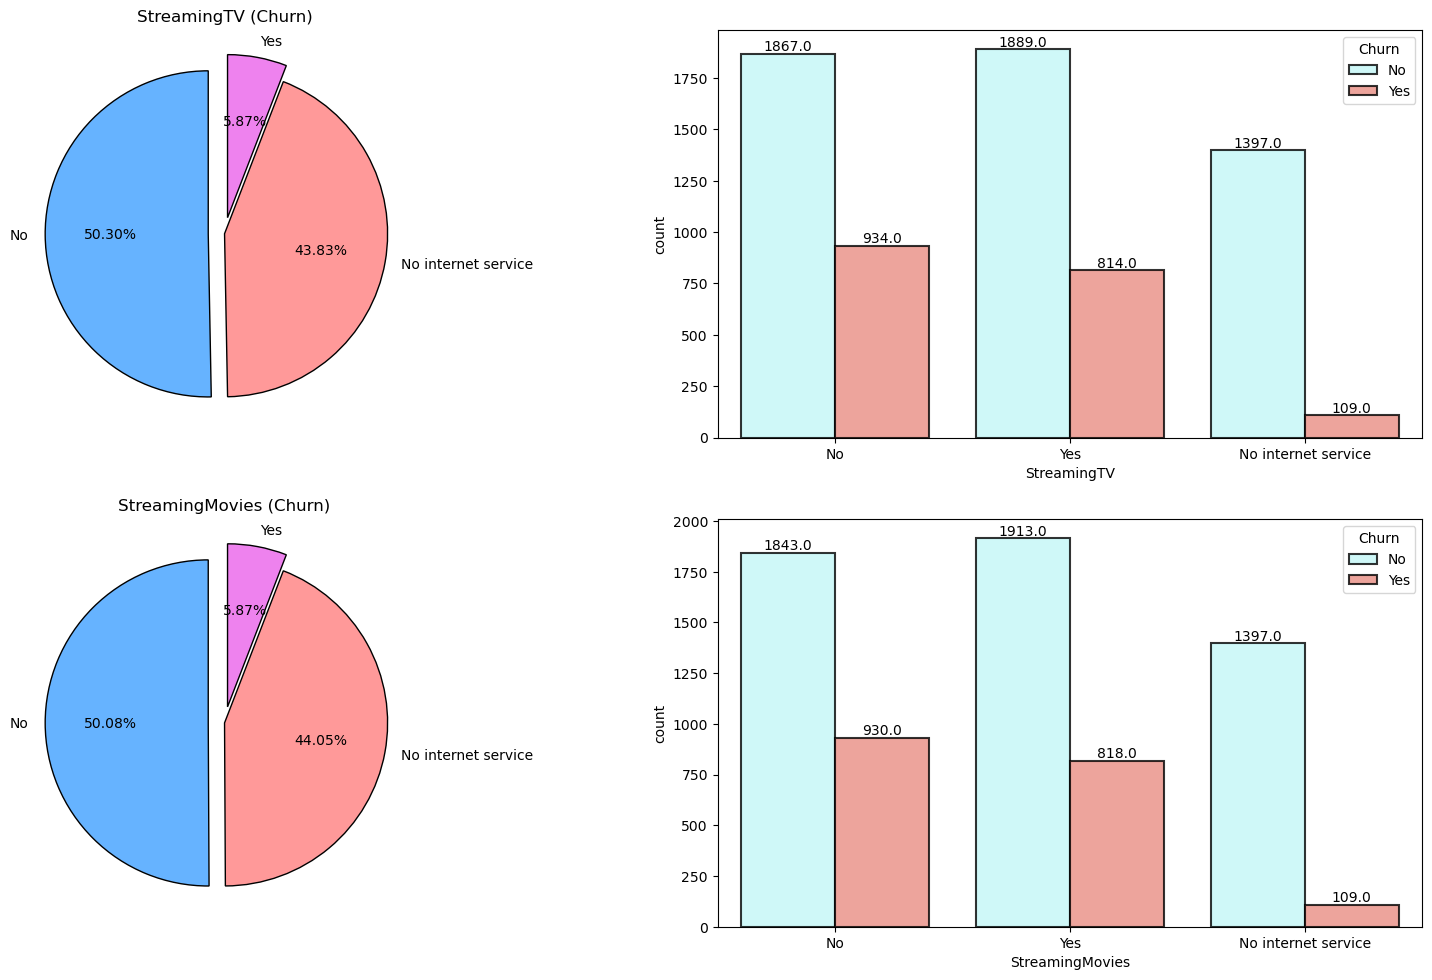

In [ ]:
fig = plt.figure(figsize=(20,18))
plt.subplot(3,2,1)
plt.pie(pie_values4,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = colorsSer,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV')
plt.subplot(3,2,2)
ax=sns.countplot(data = data, x = 'StreamingTV',hue='Churn',alpha=0.8,palette=colorsChurn, edgecolor='black', linewidth=1.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.subplot(3,2,3)
plt.pie(pie_values5,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = colorsSer,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies')
plt.subplot(3,2,4)
ax=sns.countplot(data = data, x = 'StreamingMovies',hue='Churn',alpha=0.8,palette=colorsChurn, edgecolor='black', linewidth=1.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

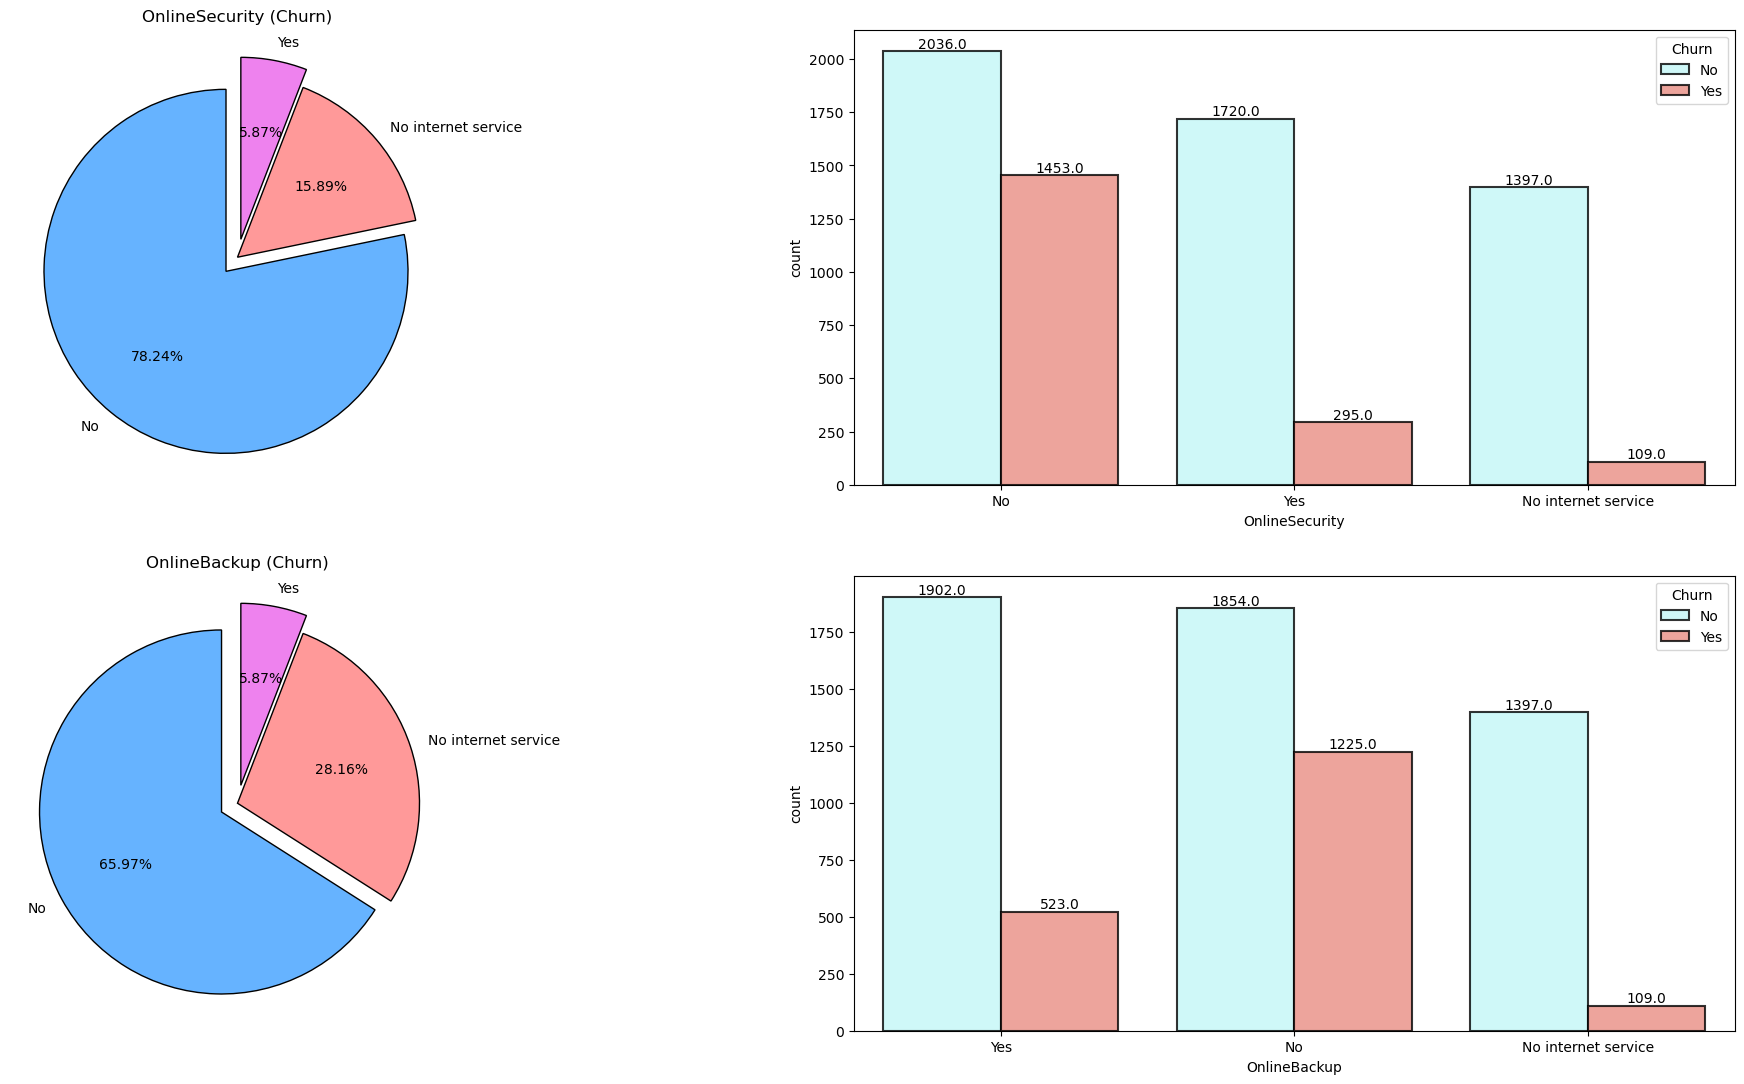

In [ ]:
fig = plt.figure(figsize=(25,13))

plt.subplot(2,2,1)
plt.pie(pie_values6,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = colorsSer,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity')
plt.subplot(2,2,2)
ax=sns.countplot(data = data, x = 'OnlineSecurity',hue='Churn',alpha=0.8,palette=colorsChurn, edgecolor='black', linewidth=1.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.subplot(2,2,3)
plt.pie(pie_values7,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = colorsSer,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup')
plt.subplot(2,2,4)
ax=sns.countplot(data = data, x = 'OnlineBackup',hue='Churn',alpha=0.8,palette=colorsChurn, edgecolor='black', linewidth=1.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

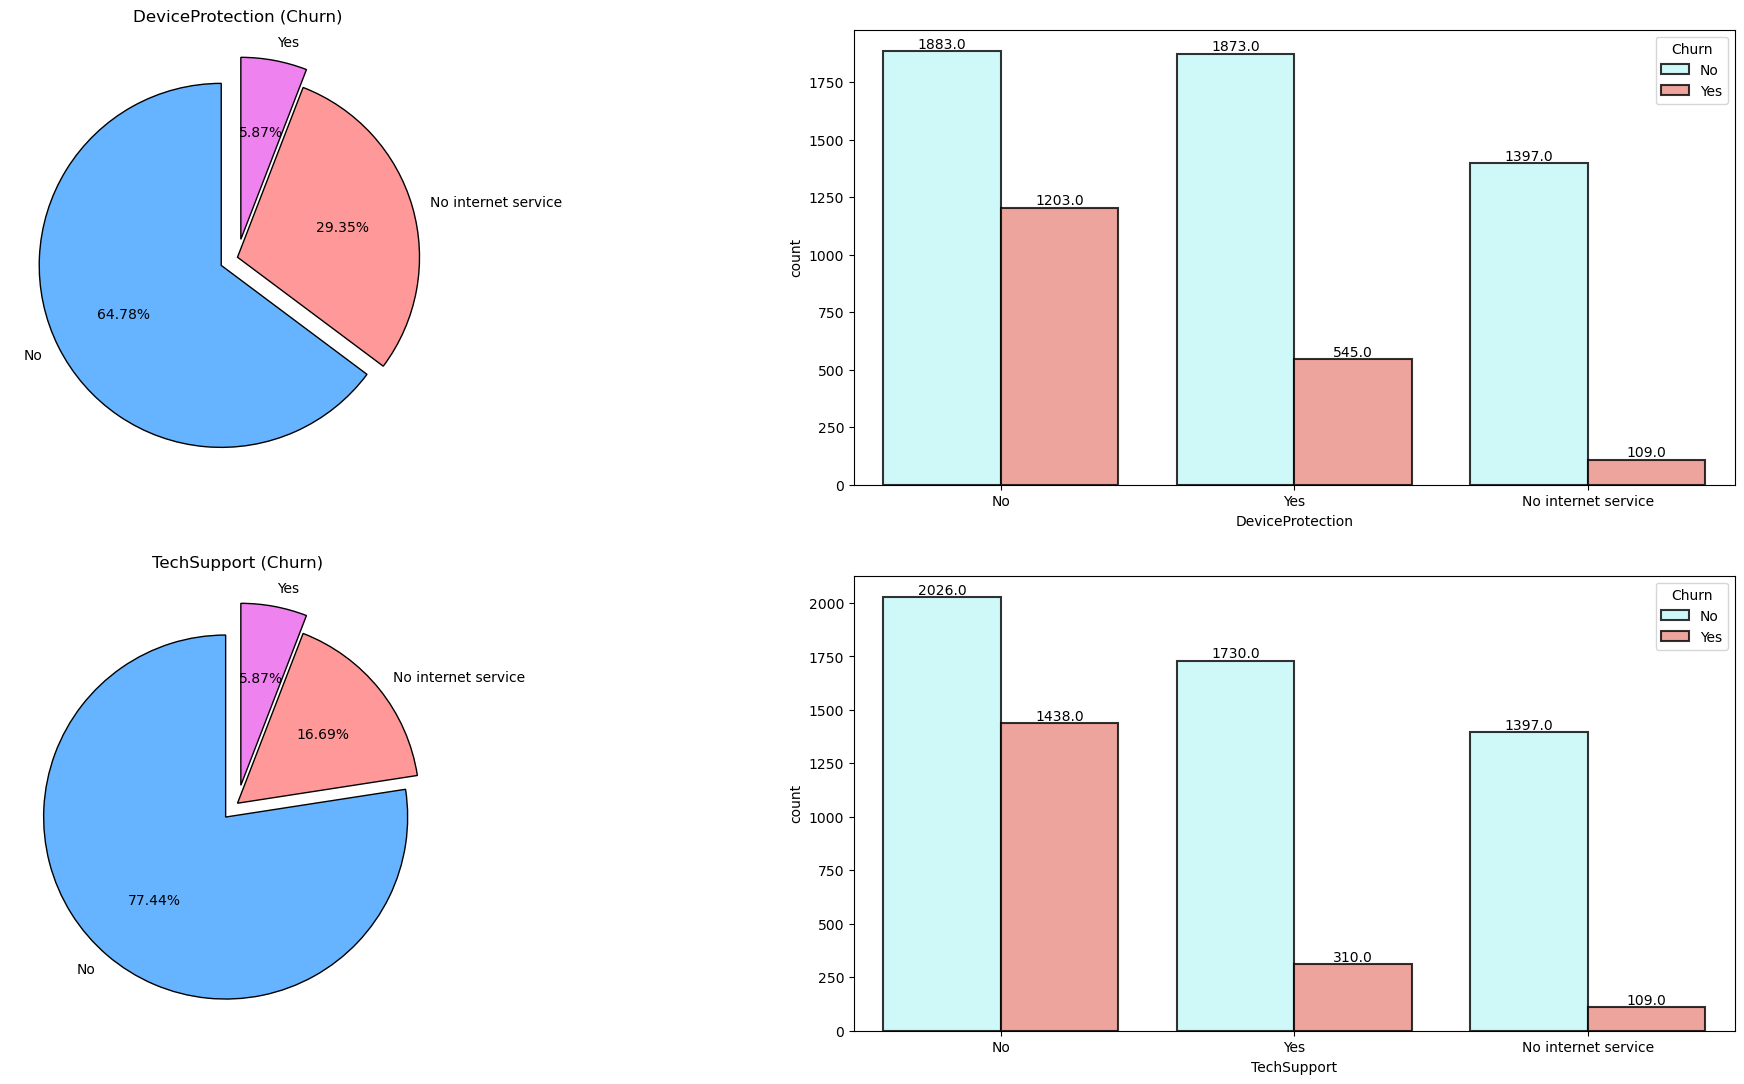

In [ ]:
fig = plt.figure(figsize=(25,13))
plt.subplot(2,2,1)
plt.pie(pie_values8,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = colorsSer,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection')
plt.subplot(2,2,2)
ax=sns.countplot(data = data, x = 'DeviceProtection',hue='Churn',alpha=0.8,palette=colorsChurn, edgecolor='black', linewidth=1.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.subplot(2,2,3)
plt.pie(pie_values9,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = colorsSer,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport')
plt.subplot(2,2,4)
ax=sns.countplot(data = data, x = 'TechSupport',hue='Churn',alpha=0.8,palette=colorsChurn, edgecolor='black', linewidth=1.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

* Những khách hàng có sử dụng dịch vụ TechSupport,DeviceProtection,OnlineBackup,OnlineSecurity có nhiều khả năng rời bỏ hơn
* Dịch vụ phát trực tuyến không thể dự đoán được tình trạng rời bỏ

### Về thanh toán

In [ ]:
contract = data[df['Churn'] == 1]['Contract'].value_counts()
pie_values1 = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100]

paperless = data[df['Churn'] == 1]['PaperlessBilling'].value_counts()
pie_values2 = [paperless[0] / sum(paperless) * 100, paperless[1] / sum(paperless) * 100] 

payment = data[df['Churn'] == 1]['PaymentMethod'].value_counts()
pie_values3 = [payment[0] / sum(payment) * 100, payment[1] / sum(payment) * 100, payment[2] / sum(payment) * 100, payment[3] / sum(payment) * 100] 

C:\Users\THINKPAD T460\AppData\Local\Temp\ipykernel_1868\2876866294.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pie_values1 = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100]
C:\Users\THINKPAD T460\AppData\Local\Temp\ipykernel_1868\2876866294.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pie_values2 = [paperless[0] / sum(paperless) * 100, paperless[1] / sum(paperless) * 100]
C:\Users\THINKPAD T460\AppData\Local\Temp\ipykernel_1868\2876866294.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, inte

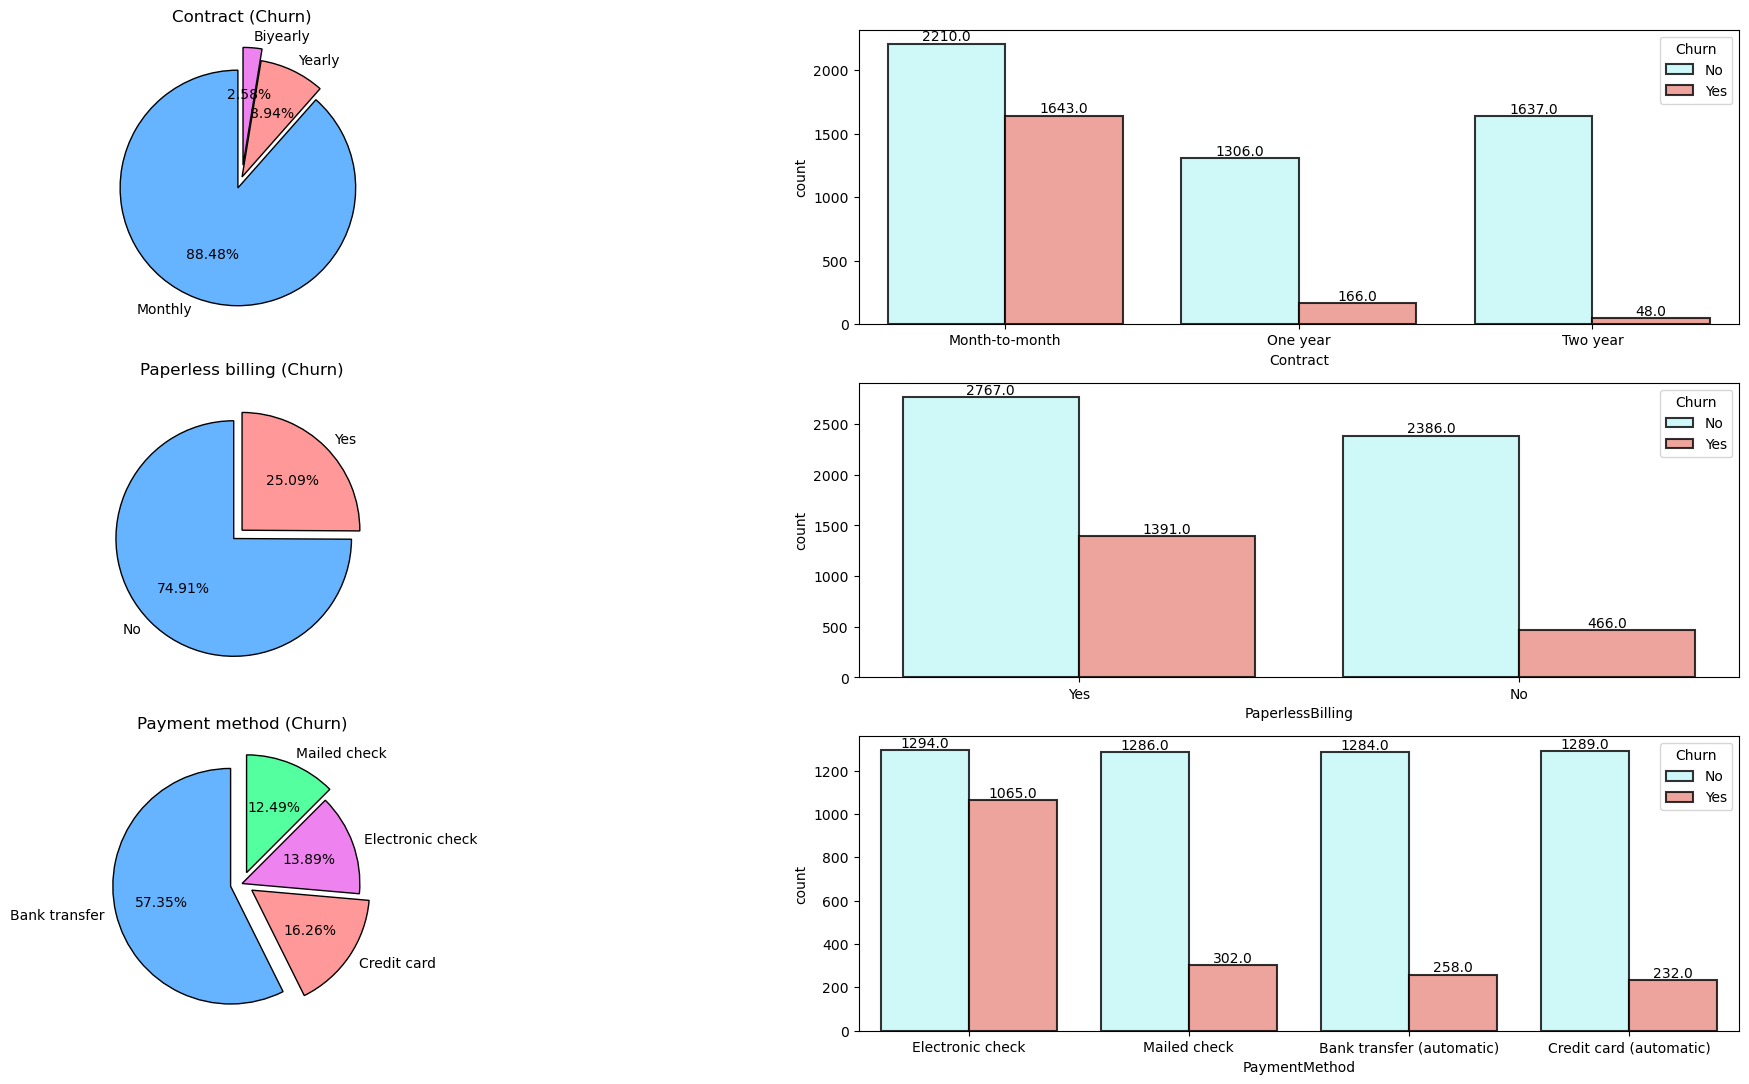

In [ ]:
fig = plt.figure(figsize=(25,13))
colorsPay = ['#66b3ff','#ff9999','#EE82EE','#54FF9F']
plt.subplot(3,2,1)
plt.pie(pie_values1,labels = ['Monthly','Yearly','Biyearly'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = colorsPay,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract (Churn)')
plt.subplot(3,2,2)
ax=sns.countplot(data = data, x = 'Contract',hue='Churn',alpha=0.8,palette=colorsChurn, edgecolor='black', linewidth=1.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.subplot(3,2,3)
plt.pie(pie_values2,labels = ['No','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = colorsPay,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Paperless billing')
plt.subplot(3,2,4)
ax=sns.countplot(data = data, x = 'PaperlessBilling',hue='Churn',alpha=0.8,palette=colorsChurn, edgecolor='black', linewidth=1.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.subplot(3,2,5)
plt.pie(pie_values3,labels = ['Bank transfer','Credit card','Electronic check','Mailed check'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0.1,0,0.1),
        colors = colorsPay,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Payment method')
plt.subplot(3,2,6)
ax=sns.countplot(data = data, x = 'PaymentMethod',hue='Churn',alpha=0.8,palette=colorsChurn, edgecolor='black', linewidth=1.5)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')


* Hợp đồng ngắn hạn có tỷ lệ rời bỏ cao hơn nhiều.
* Những khách hàng sử dụng phương thức thanh toán không cần giấy tờ có nhiều khả năng rời bỏ hơn.
* Khách hàng sử dụng séc điện tử làm phương thức thanh toán có nhiều khả năng rời bỏ hơn.

## Tương quan giữa các thuộc tính

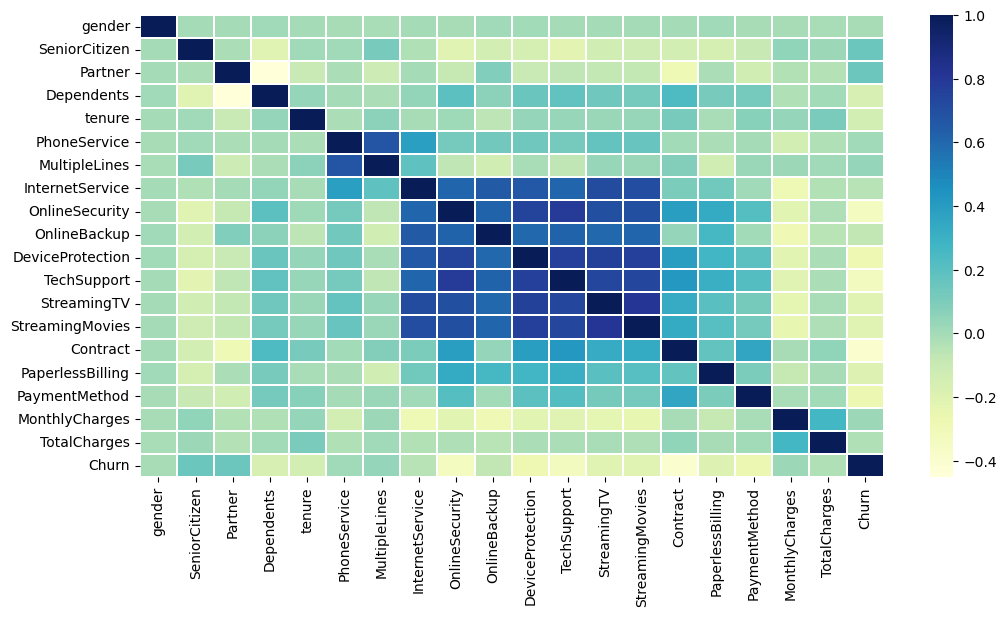

In [ ]:
plt.figure(figsize=(12, 6))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

<Axes: >

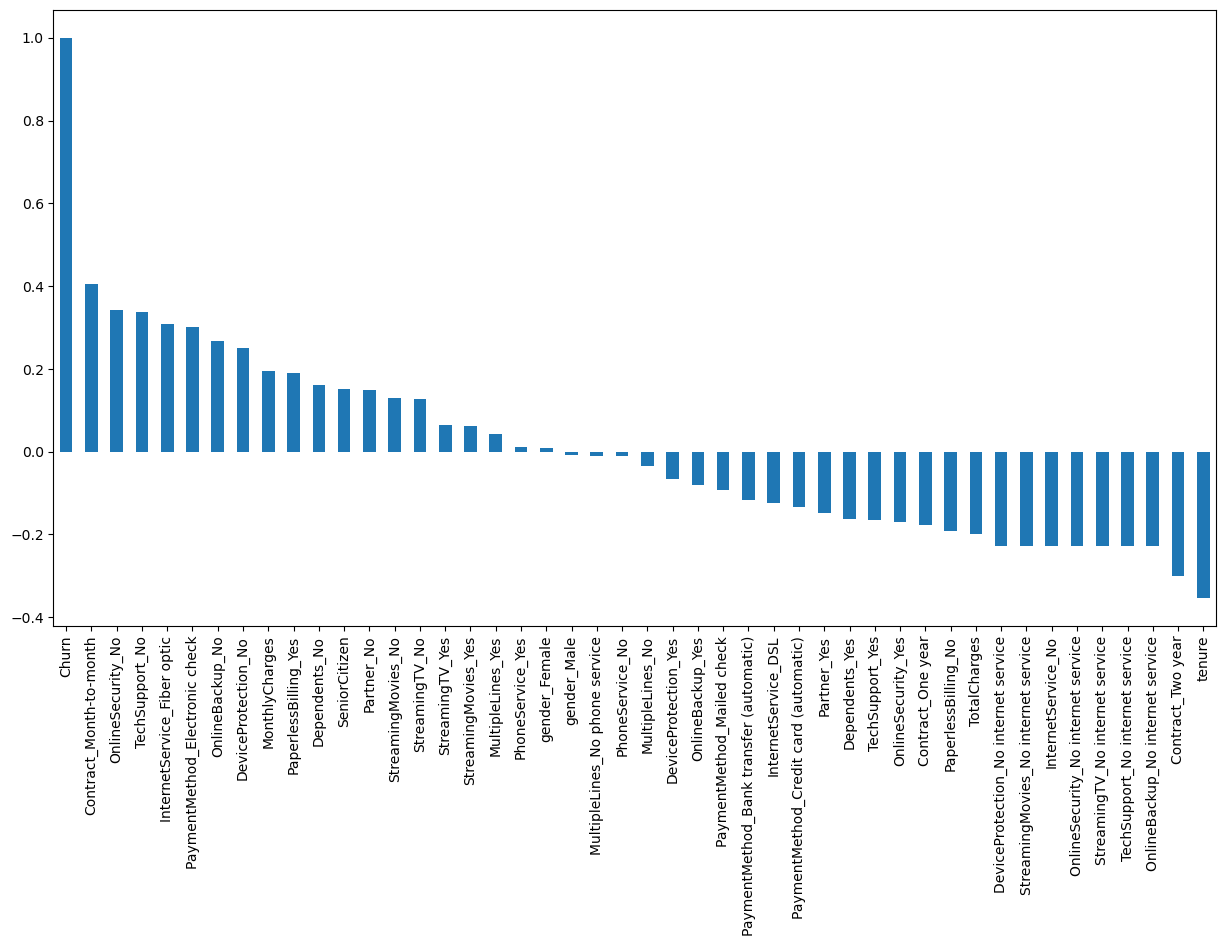

In [ ]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

* Contract_Month-to-month, OnlineSecurity_No,TechSupport_No, InternetService_ Fiber Obtic, … dường như có mối tương quan tích cực với khả năng rời bỏ.
* Tensure, Contract_Two-yea,… dường như có mối tương quan nghịch với khả năng rời bỏ.
* Những người đăng ký dịch vụ Internet từ Fiber Obtic cùng với các dịch vụ đi kèm có khả năng rời bỏ cao hơn.

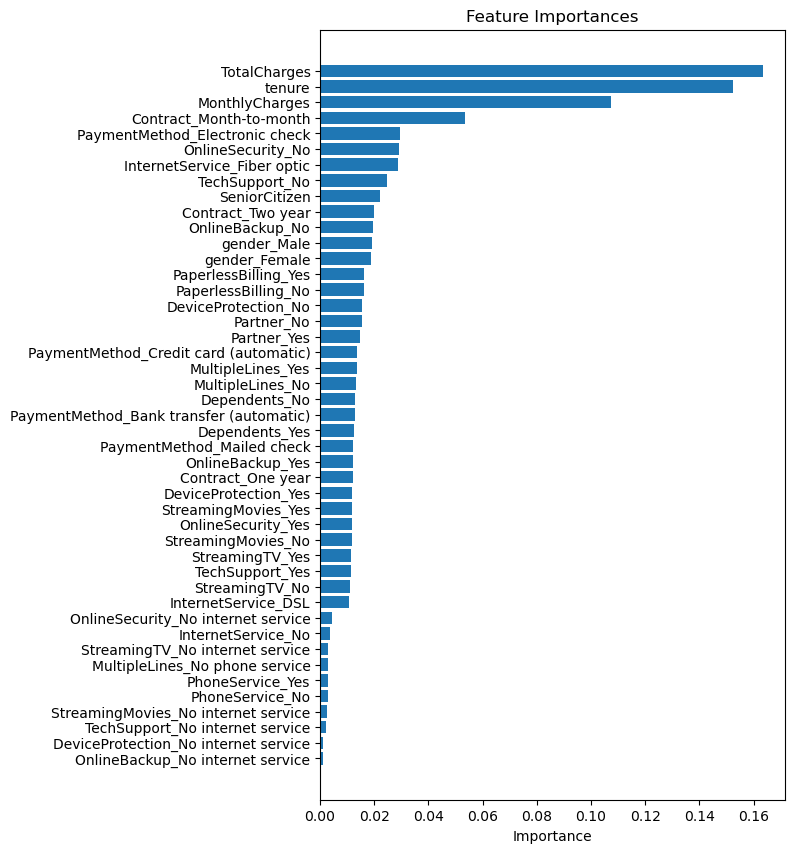

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = df_dummies.drop('Churn', axis=1)
y = df_dummies['Churn']

clf = RandomForestClassifier()
clf.fit(X, y)

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6, 10))  
plt.title('Feature Importances')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlabel('Importance')
plt.gca().invert_yaxis() 
plt.show()

Từ thuật toán random forest,các thuộc tính monthly contract, tenure và total charges là các biến dự báo quan trọng nhất để dự đoán tình trạng rời bỏ.
